<a href="https://colab.research.google.com/github/PaulNjinu254/Fuji-Descent-Problem/blob/main/Fuji_Descent_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving mtfuji_data.csv to mtfuji_data (26).csv


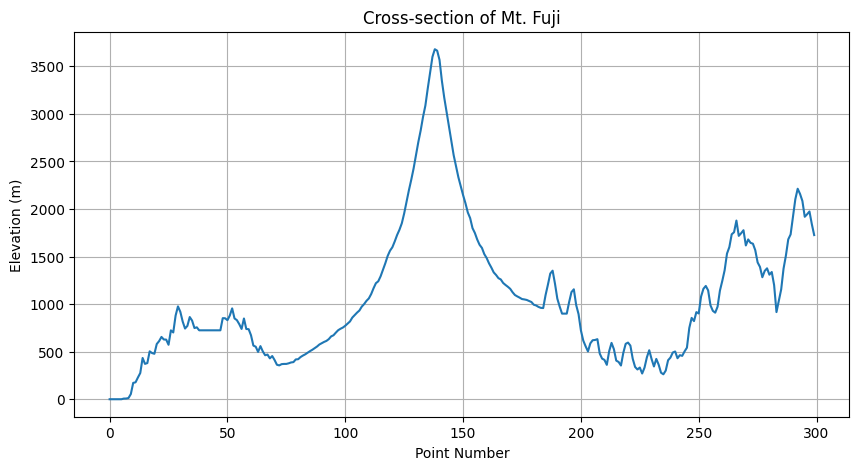

Visited points: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
Total steps: 14
Final elevation: 371.19


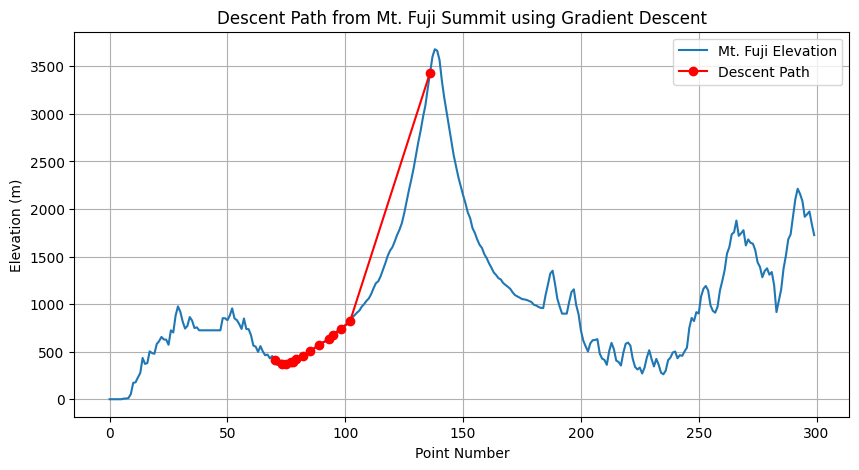

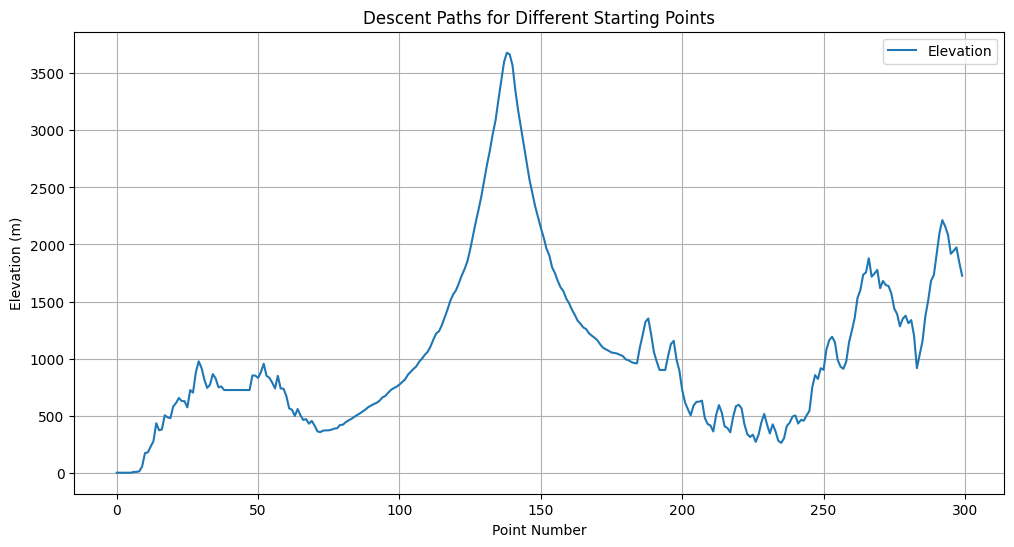

Error: Current point must be between 1 and len(elevation) - 1


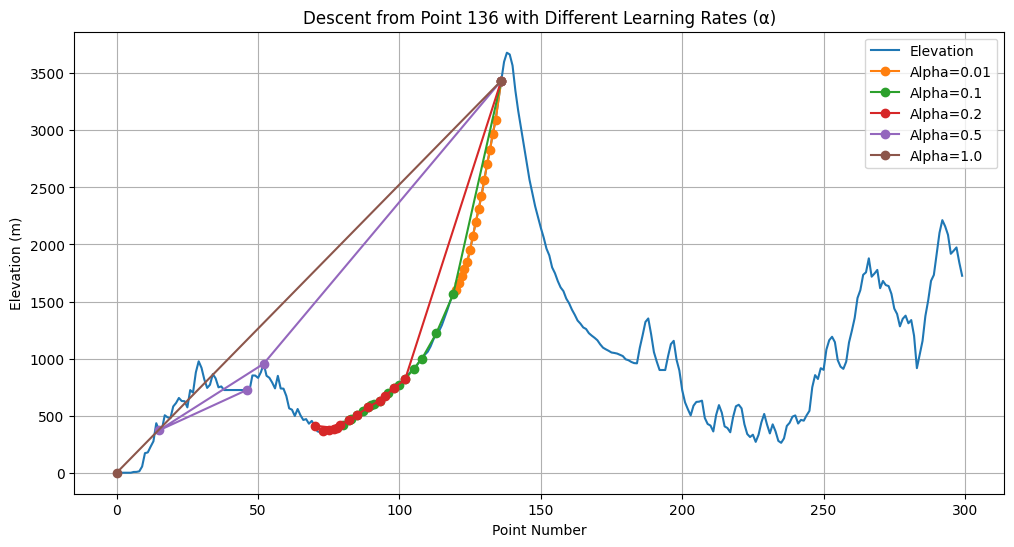

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Load and preprocess the data
csv_path = "mtfuji_data.csv"
np.set_printoptions(suppress=True)  # Disable scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract elevation data (assuming it's in column index 3)
elevation = fuji[:, 3]

# Problem 1: Visualize the elevation cross-section of Mt. Fuji
plt.figure(figsize=(10, 5))
plt.plot(elevation)
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Cross-section of Mt. Fuji")
plt.grid(True)
plt.show()

# Problem 2: Calculate the gradient
def calculate_gradient(i, elevation):
    if i <= 0 or i >= len(elevation):
        raise IndexError("Index must be between 1 and len(elevation) - 1")
    return elevation[i] - elevation[i - 1]

# Problem 3: Calculate the next destination using gradient descent
def calculate_destination(current_point, alpha, elevation):
    if not (0 < alpha):
        raise ValueError("Alpha must be a positive number.")
    if current_point <= 0 or current_point >= len(elevation):
        raise IndexError("Current point must be between 1 and len(elevation) - 1")

    gradient = calculate_gradient(current_point, elevation)
    next_point = current_point - alpha * gradient
    next_point_rounded = int(round(next_point))
    next_point_rounded = max(0, min(len(elevation) - 1, next_point_rounded))

    return next_point_rounded

# Problem 4: Go down the mountain
def descend_mountain(start_point, alpha, elevation):
    path = [start_point]
    current_point = start_point

    while True:
        try:
            next_point = calculate_destination(current_point, alpha, elevation)
            if next_point == current_point:
                break  # Reached local minimum or stuck due to rounding
            path.append(next_point)
            current_point = next_point
        except Exception as e:
            print(f"Error: {e}")
            break

    return path

start = 136  # Near the summit of Mt. Fuji
alpha = 0.2
descent_path = descend_mountain(start, alpha, elevation)

print("Visited points:", descent_path)
print("Total steps:", len(descent_path))
print("Final elevation:", elevation[descent_path[-1]])

# problem 5: Visualize descent path on the elevation plot
plt.figure(figsize=(10, 5))
plt.plot(elevation, label='Mt. Fuji Elevation')
plt.plot(descent_path, elevation[descent_path], 'ro-', label='Descent Path')
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Descent Path from Mt. Fuji Summit using Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

# Problem 6: Try descent from different initial values
initial_values = [10, 50, 100, 136, 142, 200]
alpha = 0.2

# Problem 7: Visualize the descent process for multiple initial values
plt.figure(figsize=(12, 6))
plt.plot(elevation, label='Elevation', linewidth=1.5)
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Descent Paths for Different Starting Points")
plt.legend()
plt.grid(True)
plt.show()

# Problem 8: Visualize impact of different alpha (learning rate)
alpha_values = [0.01, 0.1, 0.2, 0.5, 1.0]
start = 136  # fixed starting point

plt.figure(figsize=(12, 6))
plt.plot(elevation, label='Elevation', linewidth=1.5)

for a in alpha_values:
    try:
        path = descend_mountain(start, a, elevation)
        plt.plot(path, elevation[path], marker='o', label=f'Alpha={a}')
    except:
        continue

plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Descent from Point 136 with Different Learning Rates (α)")
plt.legend()
plt.grid(True)
plt.show()